In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import dsolve

# Equação de flexura por diferenças finitas (versão 2)

A matriz $\textbf A$ é um tipo de matriz esparsa, ou seja, a maior parte dos elementos da matriz são nulos. Para observar essa característica, vamos gerar a matriz $\textbf A$ e visualizar os elementos da matriz que são diferentes de zero. Nesse exercício as 5 diagonais foram preenchidas com 1 (apenas para indicar um valor diferente de zero) e usou-se a função `imshow` do `matplotlib` para possibilitar a visualização dos elementos não-nulos.

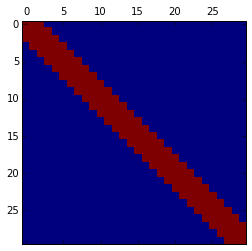

In [2]:
N = 30

A = np.zeros((N,N))

A[range(N),range(N)]= 1
A[range(0,N-1),range(1,N)]=1
A[range(1,N),range(0,N-1)]=1
A[range(0,N-2),range(2,N)]=1
A[range(2,N),range(0,N-2)]=1

plt.matshow(A, interpolation='nearest')
plt.show()

Nesta figura os elementos não-nulos são representados por quadrados vermelhos. Podemos ver que a maior parte dos elementos são nulos (região em azul). O efeito fica ainda mais evidente com o aumento do número de pontos $N$. (_Verifique!_)

Assim há um grande desperdício de memória para alocar a matriz $\textbf A$. Adicionalmente, a eficiência da solução do sistema linear fica comprometida, ou seja, o algoritmo gasta um tempo significativo multiplicando e somando termos nulos que não influenciam no resultado final. 

Podemos melhorar a eficiência do algoritmo alocando apenas os termos não-nulos da matriz $\textbf A$. Para isso vamos ter que importar alguns métodos para manipulações algébricas de matrizes esparsas da biblioteca Scipy, como indicado no início deste notebook:

```Python
from scipy import sparse
```

Para alocar a matriz esparsa, teremos que criar 3 vetores auxiliares: um para armazenar os valores dos elementos não-nulos e outros dois para armazenar os índices $(i,j)$ dos respectivos elementos.

Por exemplo, considere a seguinte matriz esparsa (onde os pontos representam os elementos nulos, indicados desta forma para facilitar a visualização dos termos não-nulos) 
$$
\begin{bmatrix}
1 & 2 & . & . \\
. & 3 & 4 & 5 \\
. & . & 6 & . \\
. & . & . & 7 \\
\end{bmatrix}
$$ 

Para representá-la de forma compacta vamos criar um vetor `vals` para armazenar os valores e dois vetores `indi` e `indj` para armazenar os índices das linhas e das colunas, respectivamente. O resultado seria o seguinte:

```Python
vals = [1, 2, 3, 4, 5, 6, 7]
indi = [0, 0, 1, 1, 1, 2, 3]
indj = [0, 1, 1, 2, 3, 2, 3]
```
Para criar a matriz esparsa usamos a classe `csr_matrix` (_Compressed Sparse Row matrix_):
```Python
ni,nj = 4,4
Asp = sparse.csr_matrix((vals,(indi,indj)), shape=(ni,nj))
```
onde `ni` e `nj` são respectivamente o número de linhas e colunas da matriz.

Podemos obter a matriz "cheia" original, com os zeros, usando-se o método `todense()`:
```Python
Aoriginal = sparse.csr_matrix((vals,(indi,indj)), shape=(ni,nj)).todense()
```

A matriz esparsa pode ser multiplicada com um vetor ou matriz usando-se o método `dot()`:
```Python
v = [1,1,1,1]
b = Asp.dot(v)
```

Para resolver o sistema linear  `Asp v = b` usa-se o método `spsolve`:
```Python
v = dsolve.spsolve(Asp,b)
```
e o seguinte módulo deve ser importado:
```Python
from scipy.sparse.linalg import dsolve
```

Agora vamos criar uma classe que contenha, além dos dois métodos da classe do exercício anterior, um método __numerico2__ que utilize a matriz esparsa de forma compacta.

Com a nova classe, verifique que o modelo numérico converge para a solução analítica quando o espaçamento $\Delta x$ dicresce.

Agora vamos verificar qual a diferença do tempo de execução entre os métodos numéricos que utilizam matriz cheia e matriz vazia.